In [12]:
import torch
from PIL import Image
import numpy as np
from torchvision.transforms.functional import normalize
import matplotlib.pyplot as plt
from models.unet import UNet
import cv2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 256, 256])


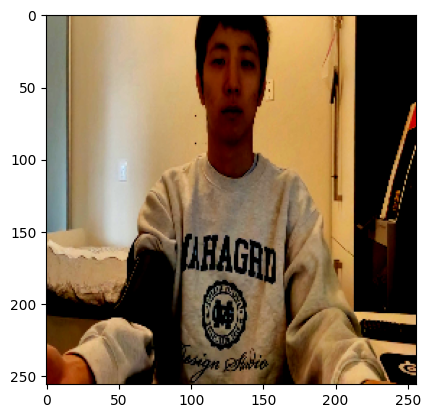

In [27]:
device = torch.device("cpu")
model = UNet(3, 1)
model.load_state_dict(torch.load("./output/temp_2000")["model"])
model = model.to(device)
model.eval()

#image = np.asarray(Image.open(r"./original/Photo on 2023-10-19 at 6.18 PM.jpg"), dtype=np.float32) / 255
image = np.asarray(Image.open(r"./test.jpg"), dtype=np.float32) / 255

image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_NEAREST)

image = image.transpose((2, 0, 1))

image = torch.from_numpy(image).to(device)

image = normalize(image, mean=(0.5612, 0.5397, 0.5159), std=(0.2515, 0.2405, 0.2317), inplace=True)

plt.imshow(image.permute(1, 2, 0).cpu().numpy())
print(image.shape)

image = torch.unsqueeze(image , 0)

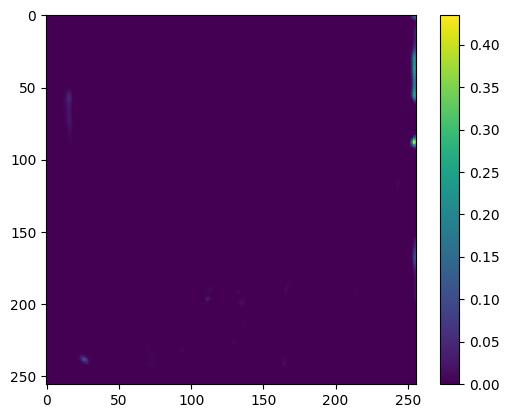

In [28]:
output = model(image)

output = np.transpose(np.squeeze(torch.sigmoid(output.detach()).cpu().numpy(), 0), (1, 2, 0))
plt.imshow(output)
plt.colorbar()